# Problem set for Swipe Right to Spike: Part 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# feel free to use this functions to make your plots look nicer :)
def set_font_size(ax, font_size, legend_font_size=None):
    """Set fontsize of all axis text objects to specified value."""

    texts = ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels())

    for text in texts:
        text.set_fontsize(font_size)

    if legend_font_size is None:
        legend_font_size = font_size

    legend = ax.get_legend()

    if legend:
        for text in legend.get_texts():
            text.set_fontsize(legend_font_size)

# 3. White noise

Gaussian white noise is a common stimulus in neuroscience because it is one of the simplest random processes that still samples diverse patterns.

A. Generate 5 seconds of a Gaussian white noise stimulus at 1000 Hz with zero mean and a standard deviation of 3 nA (in any given $\Delta t$). How big should each timestep be? Plot the resulting trace over time. Plot a histogram of the stimulus values aggregated over time using 30 bins. What are the mean and standard deviation of your sample? How do you expect their accuracy to the true mean and standard deviation to change as the number of samples increase?

B. A key specifier of a temporal random process $X(t)$ is its autocovariance function $C(\tau)$, which gives the covariance between two samples of the process at a time lag $\tau$. That is, $C(\tau) = E[(X(t) - E[X(t)])(X(t - \tau) - E[X(t - \tau)])]$. The variance of $X$ at a single timestep is then just $C(0) = E[(X(t) - E[X(t)])^2]$.

White noise is a useful process because $X$ at all timepoints are independent, so that $C(\tau \neq 0) = 0$, i.e. there is zero covariance between time points separated by a nonzero time lag. Mathematically, $C(\tau) = \sigma^2 \delta(\tau)$, where $\delta(\tau)$ is the $\delta$ function, which is infinite at $\tau = 0$ and 0 otherwise, and satsifies $\int_{-\infty}^{\infty} \delta(\tau) d\tau = 1$. This means that in continuous time, the variance of a white noise process $C(0)$ is infinite. This is weird, but it turns out the integration property of the $\delta$ function means things are actually well behaved.

Given the above information, what units is $\delta(\tau)$ in? If X is in units of nA, what units is $C(\tau)$ in? What units is $\sigma$ in?

C. To generate a discretized approximation to white noise using timestep $\Delta t$ we need to specify the standard deviation to use in any given individual time bin. Of course, we can't actually use $\sigma^2 \times \infty$ as a variance since then everything will be infinite and there will be no dependence on $\sigma$. What is the natural way to discretize the $\delta$ function given $\Delta t$? (Hint: it is not simply the Kronecker delta function.)

D. Given the discretized $\delta$ function from C, what standard deviation must we use at each timestep to generate an accurate discrete approximation of a white noise process that has with autocovariance $C(\tau) = \sigma^2 \delta(\tau)$ in continuous time?

E. First, generate a 1-second long sample of a Gaussian white noise process discretized at $\Delta t = 1$ ms, whose standard deviation per timestep is 1 nA. What is $\sigma$? Using the above results, generate a sample of an equivalent white noise process discretized at $\Delta t = 0.5$ ms. Repeat for $\Delta t = 5$ ms. Plot all three samples.

# 4. LIF model

A. Make a leaky integrate-and-fire model with $\tau = 50$ ms, $v_{leak}$ = -70 mV, $v_{th}$ = -40 mV, and $R = 20$ M$\Omega$. Specifically, write a function that takes an external current sequence `i_ext` and outputs (a) a sequence of membrane voltages, (b) a binary spike sequence, (c) an array of spike times, (d) a time vector. Assume $\Delta t = 1$ ms.

B. Using your function, drive the LIF neuron with a 3-second step input of current starting at 100 ms. Vary the current amplitude over 0 nA, 0.25 nA, 0.5 nA, ..., 5 nA. Plot example voltage responses and spikes for a small, medium, and large current input.

C. Use the results of B to make an "f-i" curve, which shows the firing rate $f$ (estimated over the 3 seconds) as a function of the current input $i$.

D. Now drive the neuron for 100 s with a white noise stimulus whose standard deviation in one time bin is 8 nA. Plot the inter-spike interval distribution of the resulting spike sequence. What can you say about the distribution of spikes?

In [5]:
def run_lif(i_ext):
    """Run LIF neuron simulation given external current."""
    ...
            
    return v, spks, ts_spk, t

# 5. LNP model

A. Using the linear-nonlinear-Poisson modeling framework, construct a model neuron that preferentially spikes when the (leaky) moving average over the last ~30 ms of the stimulus is large. Use the sinusoidal stimulus given in `lnp_stim.npy` as a guide (for example, this might be the time-varying luminance of an image on a monitor). This is a 10 s stimulus sampled at 1000 Hz. Plot your filter, the distribution of the sinusoidal stimulus projected onto the filter, and your chosen nonlinearity.

B. Drive the neuron with the stimulus given in `lnp_stim.npy` and plot the resulting firing rate and a few example spike trains over 2 seconds, with the stimulus shown in a plot below. Does the neuron appear to be doing what it's supposed to?

C. Repeat A and B for a neuron that spikes in response to a large-magnitude (sign-independent) time-derivative, also computed over 30 ms or so.

D. Plot several example spike trains for each of your two neurons overlaid with the stimulus shown below.

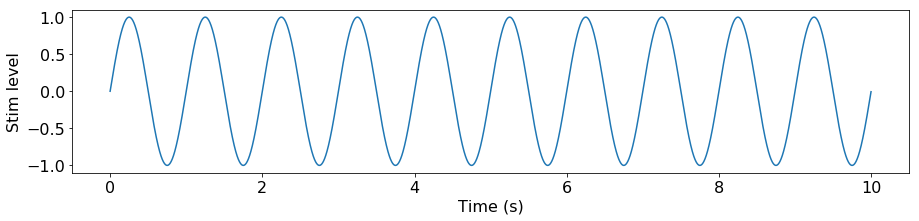

In [11]:
DT = 1/1000

# load data and plot stim
data = np.load('lnp_stim.npy')[0]

t = data['t']
s = data['s']

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.plot(t, s)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Stim level')

set_font_size(ax, 16)

# 6. Synaptic connectivity

Consider the conductance-based synapse equation for a single presynaptic input shown in the slides:

$\tau \cfrac{dV}{dt} = -(V(t) - V_{leak}) + RI(t) + RI_{syn}(t)$

$I_{syn}(t) = g_{syn}(t)(V(t) - E_{syn})$

$g_{syn}(t) = w \sum\limits_{t^k_{spk}} \alpha(t - t^k_{spk})$

A. How would you generalize the conductance-based synapse equations to account for multiple presynaptic inputs with different excitatory synaptic weights?

B. How would you generalize this to multiple synapse types (e.g. excitatory and inhibitory)?

# 7. Spike-triggered average

The H1 neuron is a motion-processing neuron in the fly visual system. A 20 minute, 500 Hz recording of a white noise visual motion stimulus and the corresponding spikes are given in the file `dayan_2001_h1_neuron.mat` (stolen from here: http://www.gatsby.ucl.ac.uk/~dayan/book/exercises.html ). Run the next cell to load this data into Python.

Using these data:

A. Plot a short segment of the stimulus and spike response.

B. Compute and plot the spike-triggered average of the H1 neuron over 300 ms to gain insight into what motion feature make this neuron fire (Note: this is problem C1P8 from [Theoretical Neuroscience by Dayan and Abbott (2001)](http://www.gatsby.ucl.ac.uk/~dayan/book/exercises.html)).

C. Compute the projection $s_0$ of the stimulus onto the STA for all time points past 300 ms.

D. Plot the spike-triggered and prior distributions of $s_0$ on the same plot.

E. Compute and plot the probability of firing in a given time bin, $p(spk=True|s_0)$ as a function of $s_0$, overlaid on the plots from D.

In [17]:
# load data
from scipy import io

data = io.loadmat('dayan_2001_h1_neuron.mat')
s = data['stim'].flatten()
spks = data['rho'].flatten()

# 8. Characterizing a mystery neuron

The data in `mystery_nrn.npy` was recorded from a "mystery" model neuron. As usual, it contains a time-varying stimulus and the corresponding spike train. Use the ideas and techniques from this tutorial to attempt to characterize what the neuron is doing, if anything at all. Make relevant plots to justify your conclusion.

If you come up with a hypothesis about what this neuron is doing, the function `gen_spks` in the file `mystery.npy` will output a spike train for this neuron given a stimulus. Design a stimulus to test your hypothesis and plot several example resulting spike trains to see if you are correct.

## Load data

In [32]:
# gen data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# load data
data = np.load('mystery_nrn.npy')[0]

t = data['t']
s = data['s']
spks = data['spks']

## Analyze data

In [ ]:
...

## Test hypothesis

In [43]:
from mystery import gen_spks

DT = 1/1000

t = ...
s = ...

spks_mystery = []

for ctr in range(10):
    spks = gen_spks(t, s)
    spks_mystery.append(spks)

/home/melete/Dropbox/Repositories/imbizo_2019_spikes_tutorial/mystery.py:51: RuntimeWarning: invalid value encountered in less
  spks = np.random.rand(len(t)) < p_spk
